<a href="https://colab.research.google.com/github/FunSizeNanoByte/kitkats/blob/Collab/ML_mid_rescaling_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#midterm

Introduction:

With the increasing availability of electronic health record (EHR), data-driven decision making has become vital for clinical organizations seeking to improve care delivery. In this exam, we are going to build a machine learning model to predict cancer diagnostic results.

Dataset:

cancer_updated.csvDownload cancer_updated.csv
Logistics:

Due Date: Oct-11-2023, 6:45 PM
Submission File Format: html or pdf. (Incorrect file or unseen content will be given zero point.)
Open Note
Tasks:

Use python code to solve the following questions:

Tips for Success:

For the question 3, please note that one variable is numeric and another variable is categorical.
Pay attention when you build the training set, we use the first 70% of the data to train the model.
Pay attention when you construct the feature set. We need to use all the features (numeric and standardized).
The training set includes both feature set and target variable.
Python Libraries You May Use:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
Good Luck!

##1. Load the data to google colab, and use a proper visualization tool to display the relationship between "radius_mean" and "texture_mean". Based on your observation of question 1, do you think "radius_mean" and "texture_mean" are positively related? Type your answer in the text cell. (20 points)

In [ ]:
#libraries I'll want to use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df=pd.read_csv('cancer_updated.csv')
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,gender
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,male
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,male
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,male


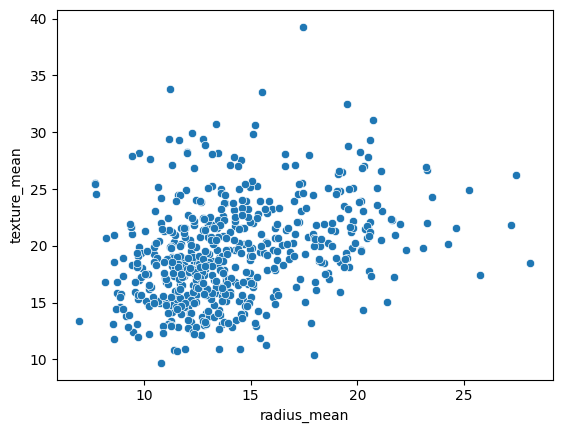

In [ ]:
#using a scatterplot to visualize the correlation
sns.scatterplot(x='radius_mean',y='texture_mean',data=df)
plt.show()

<ipython-input-7-f3b4f63d3d8d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


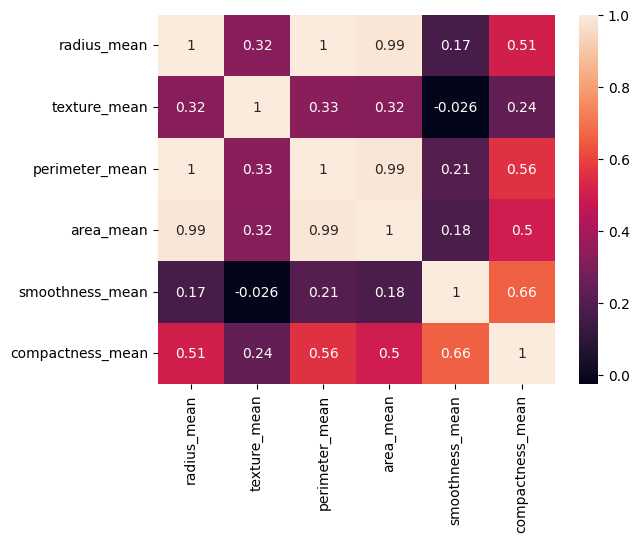

In [ ]:
#building a correlation table of all variables in the data to see a numeric correlation.
sns.heatmap(df.corr(),annot=True)
plt.show()

Radius and texture mean do show corelation of .32.
(scatterplot wasn't clear enough for me)

This indicates a positive correlation.

##2. Use visualization to display how "texture_mean" are distributed across the target variable. Explain your findings in the text cell. (30 points)

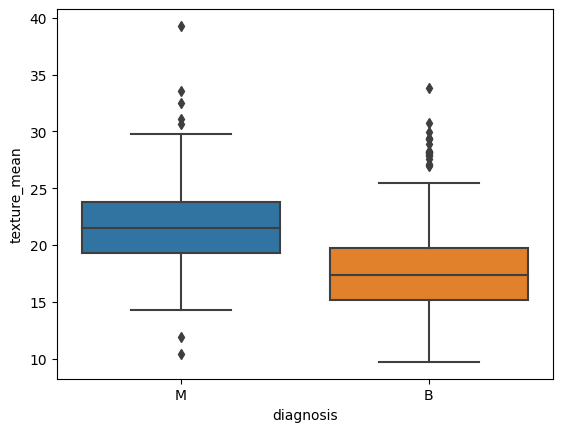

In [ ]:
#utilizing a box plot to sperate the common values in each diagnosis.
sns.boxplot(x='diagnosis',y='texture_mean',data=df)
plt.show()

a higher texture mean is correlating with a malignant diagnosis.

##3. Please use all features (which are all numeric and standardized) to develop a KNN model with the K=3. Here, let us use first 70% of the entire dataset for model training. (40 points)

In [ ]:
#i want to see the dtype of each variable in the df data set
df.dtypes
#comfirmed that all but gender and dignosis are integers.
#looking ahead at the data set, we get I think we need to standardize it and
#they are all not numeric and standardized

diagnosis            object
radius_mean         float64
texture_mean        float64
perimeter_mean      float64
area_mean           float64
smoothness_mean     float64
compactness_mean    float64
gender               object
dtype: object

In [ ]:
#i want to know how many rows and columns the variable has
df.shape

(570, 8)

In [ ]:
570*.7
#how many rows I will use for the training set.
dummied_df = pd.get_dummies(df, columns=['gender'], drop_first=True)
dummied_df.shape


(570, 8)

In [ ]:
s = StandardScaler()
columns_to_normalize = ['radius_mean','texture_mean','perimeter_mean','area_mean','area_mean','smoothness_mean','compactness_mean']
dummied_df[columns_to_normalize] = s.fit_transform(dummied_df[columns_to_normalize])
dummied_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,gender_male
0,M,1.096320,-2.072462,1.269364,0.983936,1.570347,3.286462,1
1,M,1.829403,-0.356089,1.685585,1.908811,-0.825701,-0.487431,1
2,M,1.579360,0.452162,1.566076,1.558781,0.943929,1.053917,1
3,M,-0.770485,0.250099,-0.594153,-0.765926,3.285878,3.405961,1
4,M,1.749844,-1.152728,1.776248,1.826283,0.281919,0.539881,0


In [ ]:
#create knn model for prediction
#set up features for training set
train_x=dummied_df.iloc[0:399,1:8]
train_y=dummied_df.iloc[0:399,0]
train_x.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,gender_male
0,1.09632,-2.072462,1.269364,0.983936,1.570347,3.286462,1


In [ ]:
train_y.head(1)


0    M
Name: diagnosis, dtype: object

In [ ]:
train_x.shape

(399, 7)

In [ ]:
model=KNeighborsClassifier(n_neighbors=3)

In [ ]:
#train the model
model.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=3)

##4. Predict patient a's clinical outcome, where new_patient =[[1, 2, 0.5, 0.7, 0.12, 0.3, 0.99]] (10 points)

In [ ]:
new_patient =[[1, 2, 0.5, 0.7, 0.12, 0.3, 0.99]]
prediction = model.predict(new_patient)
prediction
#questions:
#do we need to convert gender to a variable? ans:up to me
#this person's gender is .99 though? what is that?
#I assume the gender of 1 means male and not female in new_patient's data.(in a real scenario, I could know this)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['M'], dtype=object)

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,14.131630,19.303175,91.997684,655.245614,0.096340,0.104337
std,3.522474,4.309373,24.287254,351.707762,0.014060,0.052766
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380
25%,11.702500,16.172500,75.180000,420.300000,0.086130,0.065005
50%,13.375000,18.855000,86.290000,551.400000,0.095865,0.093125
75%,15.832500,21.807500,104.250000,787.050000,0.105300,0.130400
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400


In [ ]:
train_x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,gender_male
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,0.055666,-0.080374,0.056418,0.052866,0.043348,0.049462,0.501253
std,1.017372,0.958338,1.016433,1.017416,0.992221,1.042057,0.500626
min,-2.031785,-2.228074,-1.986640,-1.456309,-2.408119,-1.611481,0.000000
25%,-0.661090,-0.789247,-0.674719,-0.645407,-0.673368,-0.717229,0.000000
50%,-0.179472,-0.160994,-0.197301,-0.267347,0.038471,-0.161938,1.000000
75%,0.601915,0.527645,0.651214,0.456616,0.698345,0.547469,1.000000
max,3.971825,4.639740,3.976863,5.246895,3.442482,4.572500,1.000000


This patients predicted outcome is Malignant.


(if this data was not normalized. the diagnosis is Benign, but this person would be a massive outlier.)


if the data was given the same scaler(I think it was, due to the values falling into the min and max of my scaled data) they are malignant.



however as gender is reported as ".99", I have questions on the data of the new patient.

##5. Submit your html or pdf file below.

In [ ]:
#converting 'midterm.ipynb' to html
!jupyter nbconvert --to html midterm_robert_rader.ipynb


[NbConvertApp] Converting notebook midterm_robert_rader.ipynb to html
[NbConvertApp] Writing 781387 bytes to midterm_robert_rader.html
